In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [45]:
shot_path = 'laser_shots'
focus_point_hole_position = 9.8
hole_interval = 25 # mm

In [46]:
def filter_bright_range(img: np.ndarray, threshold: int = 100) -> np.ndarray:
    bright_pixels = img > threshold
    # get smallest and largest indices of bright pixels, both in x and y direction
    x_min, x_max = np.min(np.where(bright_pixels)[0]), np.max(np.where(bright_pixels)[0])
    y_min, y_max = np.min(np.where(bright_pixels)[1]), np.max(np.where(bright_pixels)[1])
    return img[x_min:x_max, y_min:y_max]

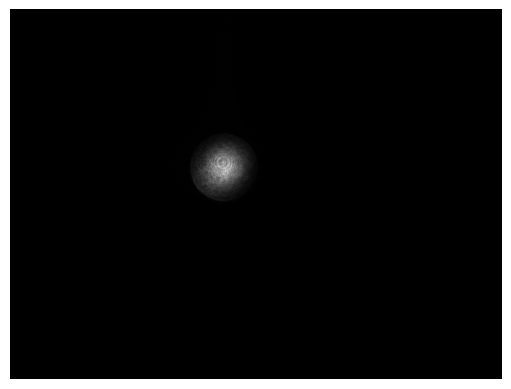

In [47]:
imgs = []
for i in range(1, 6):
    img = cv.imread(f'../laser_shots/100us/focus_100us_{i}.png', cv.IMREAD_GRAYSCALE)
    imgs.append(img)
avg_img = np.mean(imgs, axis=0)
plt.axis('off')
plt.imshow(avg_img, cmap='gray')

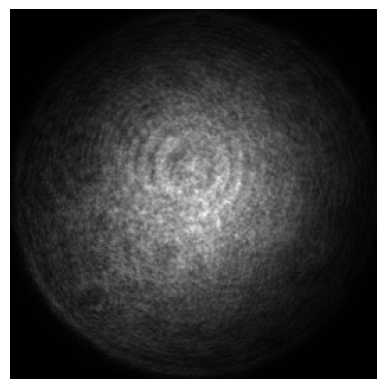

In [48]:
bright_parts = filter_bright_range(avg_img, 10)
plt.axis('off')
plt.imshow(bright_parts, cmap='gray')

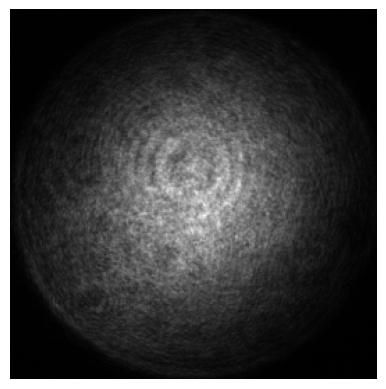

In [49]:
plt.axis('off')
plt.imshow(filter_bright_range(imgs[0], 10), cmap='gray')

In [10]:
filtered_imgs = []
for i in range(2, 14):
    img = cv.imread(f'../laser_shots/{i}h_2000us.png', cv.IMREAD_GRAYSCALE)
    filtered_imgs.append(filter_bright_range(img))

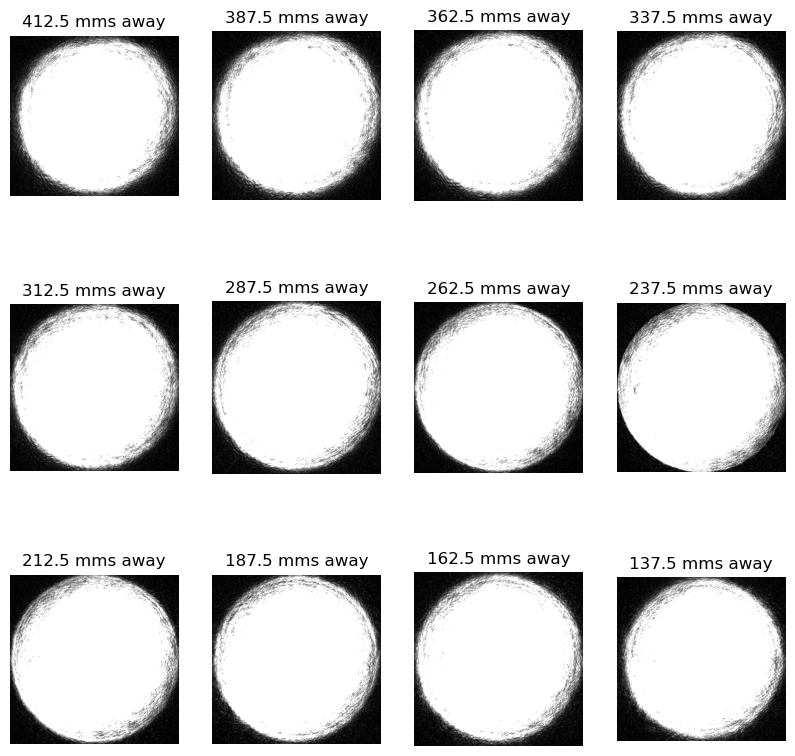

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.axis('off')
    ax.imshow(filtered_imgs[i], cmap='gray')
# set x and y labels
for ax, label in zip(axs.flat, range(2, 14)):
    ax.set_title(f'{(18.5 - label) * 25} mms away')
plt.show()